## Breast Cancer Diagnosis

---

A typical classification task to determine whether the cancer is benign or malignant.

The dataset is from UCI-ML: WDBC (Wisconsin Diagnostic Breast Cancer).

There are some features in dataset, i.e.:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)




## 1. Load data

read data and set the corresponding attribute names

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the data as DataFrame
data = pd.read_csv('./dataset/wdbc.data',header=None)
data.columns = ['id','diagnosis',
                'radius_m','texture_m','perimeter_m','area_m','smoothness_m','compactness_m','concavity_m','concave_points_m','symmetry_m','fractal_dimension_m',
                'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se',
                'radius_w','texture_w','perimeter_w','area_w','smoothness_w','compactness_w','concavity_w','concave_points_w','symmetry_w','fractal_dimension_w'
                ] # m: mean; se: standard error; w: worst case
data.head(10)

,id,diagnosis,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concave_points_m,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concave_points_w,symmetry_w,fractal_dimension_w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## 2. Data Exploration

### 2.1 Label Distribution

know more info about the categories and attributes

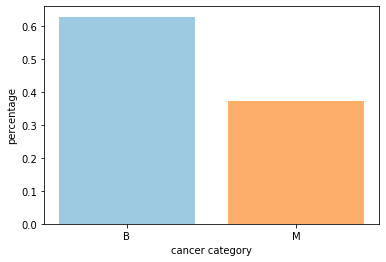

In [2]:
# drop records with missing value
data = data.dropna(axis=0)

# the label distribution
cmap = plt.get_cmap("tab20c")   # Qualitative Colormap
plt.bar(data['diagnosis'].value_counts().index, data['diagnosis'].value_counts().values/data.shape[0],
         color=cmap([2,6]))
plt.xlabel('cancer category')
plt.ylabel('percentage')
plt.show()

Notice that it is an unbalanced dataset, we need to handle this problem or it may affect the performance of the model. 

The basic theoretical concepts behind over- and under-sampling are very simple:

- With **under-sampling**, we randomly select a subset of samples from the class with more instances to match the number of samples coming from each class.

Disadvantage: lose potentially relevant information from the left-out samples.

- With **over-sampling**, we randomly duplicate samples from the class with fewer instances or we generate additional instances based on the data that we have, so as to match the number of samples in each class.

Disadvantage: run the risk of overfitting our model as we are more likely to get the same samples in the training and in the test data, i.e. the test data is no longer independent from training data. This would lead to an overestimation of our model’s performance and generalizability.

In reality though, we should not simply perform over- or under-sampling on our training data and then run the model. We need to account for cross-validation and perform over- or under-sampling on each fold independently to get an honest estimate of model performance!

We build models under different sampling methods to campare their performan in [the following section](#diff-sampling)

### 2.2 Feature Distribution

To see the distribution of feature values and the distribution in two different labels.

first 10 mean features:


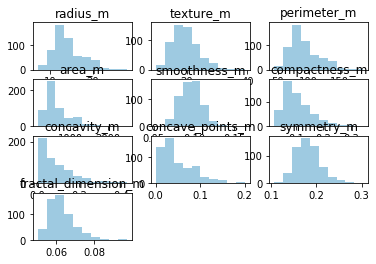

10-20 standard error features:


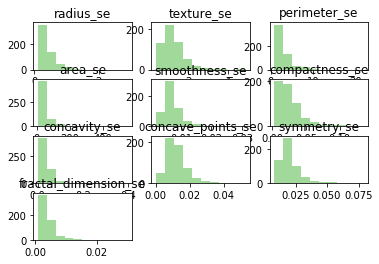

last 10 worst features:


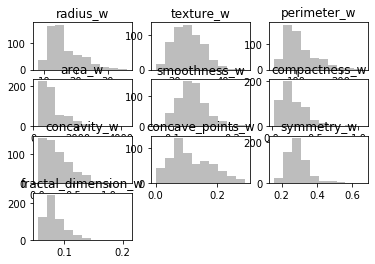

In [3]:
# the attributes distributions
# 3*4 to present 10 mean features
print('first 10 mean features:')
for i in range(2,12):
    plt.subplot(4,3,i-1)
    plt.hist(data.iloc[:,i],color=cmap([2]))
    plt.title(data.columns[i])
plt.show()
# 3*4 to present 10 standard error features
print('10-20 standard error features:')
for i in range(12,22):
    plt.subplot(4,3,i-11)
    plt.hist(data.iloc[:,i],color=cmap([10]))
    plt.title(data.columns[i])
plt.show()
# 3*4 to present 10 worst features
print('last 10 worst features:')
for i in range(22,32):
    plt.subplot(4,3,i-21)
    plt.hist(data.iloc[:,i],color=cmap([18]))
    plt.title(data.columns[i])
plt.show()

If we take a look at the attribute distributions in different class (i.e., benign or maligant), we would find out that some attributes can seperate well the labels, some may not. The following pictures are shown:

first 10 mean features:


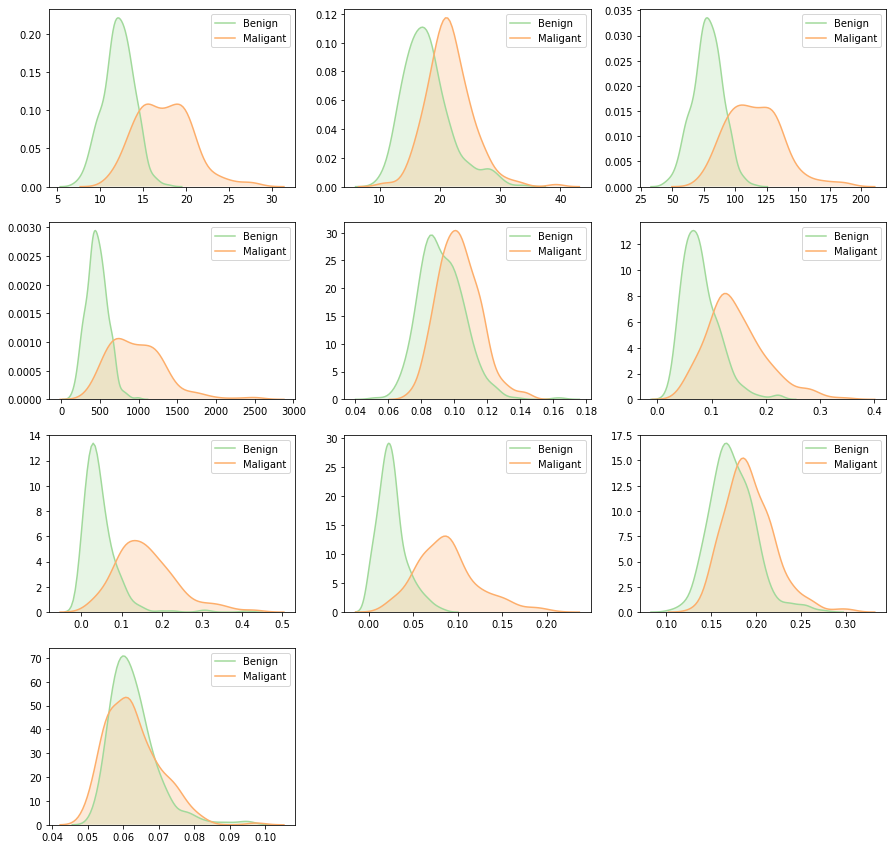

In [4]:
# the attributes distributions for different class
import seaborn as sns
# 3*4 to present 10 mean features
print('first 10 mean features:')
plt.figure(figsize=(15,15))
for i in range(2,12):
    plt.subplot(4,3,i-1)
    sns.kdeplot(data[data['diagnosis']=='B'].iloc[:,i],shade=True,label='Benign',color=cmap(np.array([10]))[0])
    sns.kdeplot(data[data['diagnosis']=='M'].iloc[:,i],shade=True,label='Maligant',color=cmap(np.array([6]))[0])
plt.show()

10-20 standard error features:


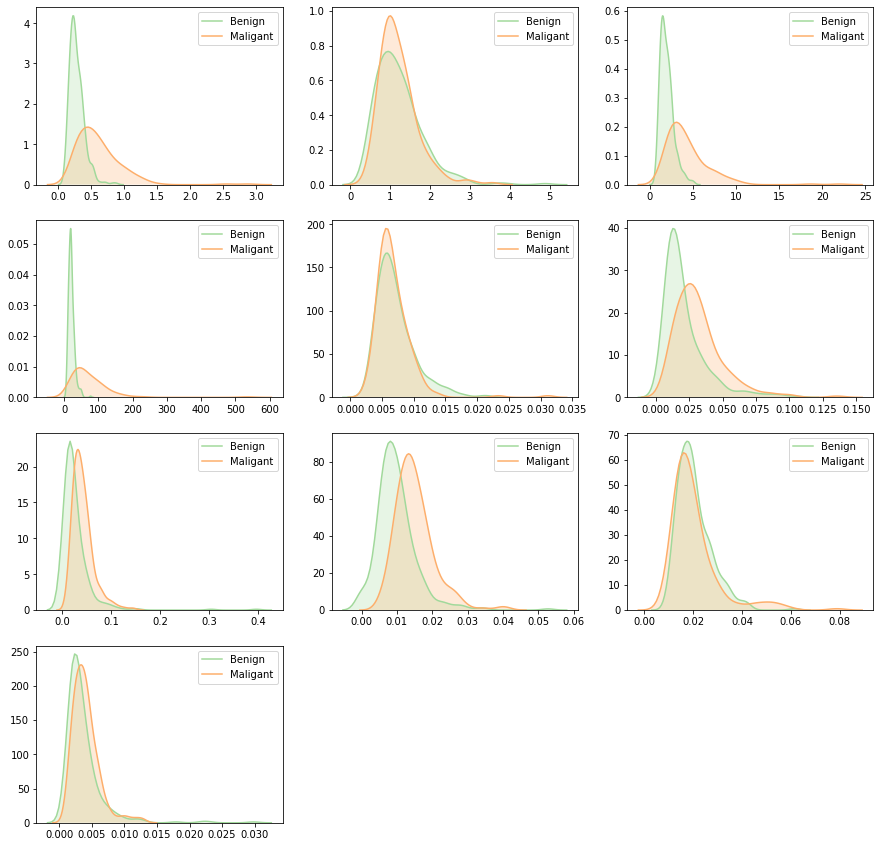

In [5]:
# 3*4 to present 10 standard error features
print('10-20 standard error features:')
plt.figure(figsize=(15,15))
for i in range(12,22):
    plt.subplot(4,3,i-11)
    sns.kdeplot(data[data['diagnosis']=='B'].iloc[:,i],shade=True,label='Benign',color=cmap(np.array([10]))[0])
    sns.kdeplot(data[data['diagnosis']=='M'].iloc[:,i],shade=True,label='Maligant',color=cmap(np.array([6]))[0])
plt.show()

last 10 worst features:


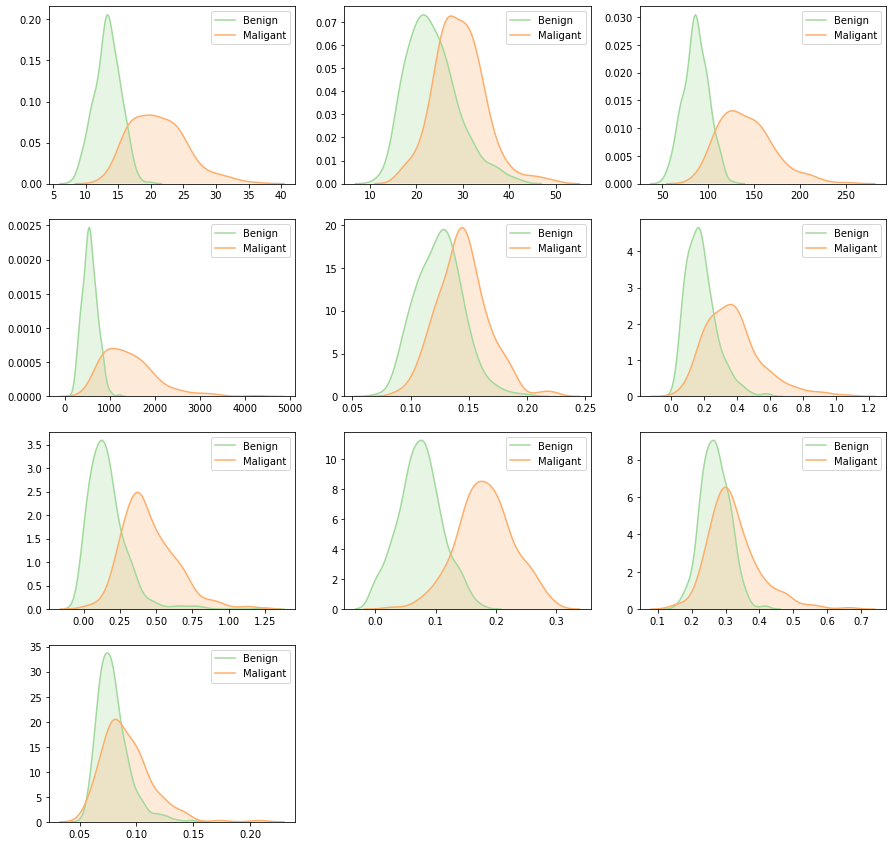

In [6]:
# 3*4 to present 10 worst features
print('last 10 worst features:')
plt.figure(figsize=(15,15))
for i in range(22,32):
    plt.subplot(4,3,i-21)
    sns.kdeplot(data[data['diagnosis']=='B'].iloc[:,i],shade=True,label='Benign',color=cmap(np.array([10]))[0])
    sns.kdeplot(data[data['diagnosis']=='M'].iloc[:,i],shade=True,label='Maligant',color=cmap(np.array([6]))[0])
plt.show()

We can see that some attributes have good distinctive performance, while others do not. So we can take a consideration of the importance of these attributes.

We consider the importance of features based on information theory and the experiment is in [the section 3.3](#importance).


### 2.3 Relation between Features

After observing the distributions of all features, we consider the relation between them: compute the correlation to see whether some of them are very relavant. 

We then try to reduce the number of features by applying some methods like PCA in [the section 2.4](#PCA)


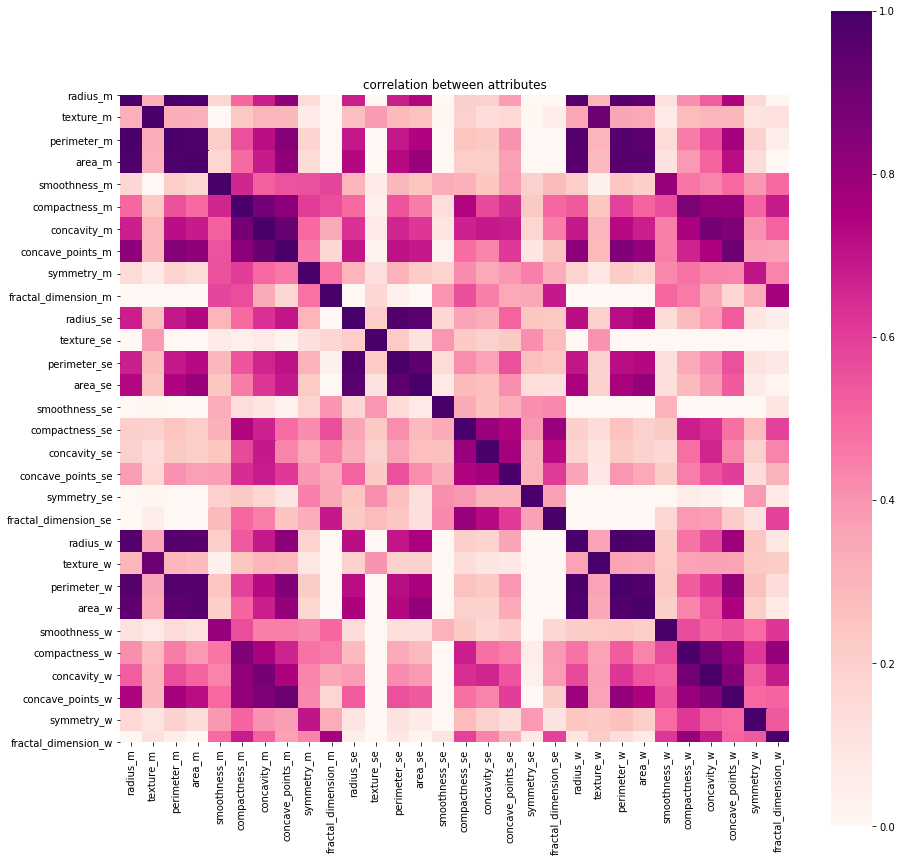

In [7]:
# correlation between attributes
plt.figure(figsize=(15, 15))
sns.heatmap(data.iloc[:,2:32].corr(), vmin=0,vmax=1, square=True, cmap="RdPu")
plt.title('correlation between attributes')
plt.show()

Notice that there are some attributes with high relations like perimeter and area. Therefore, we consider whether we can reduce the dimension, aka, reduce the number of attributes into a few features that have captured the most info. We utilize PCA (Principal Component Analysis), an unsuperviesd-learning method, to see whether we can use less attributes:

<a id='PCA'></a>

### 2.4 Features Reduction

Here we utilize an unsupervised method PCA, aka, Principal Component Analysis to reduce the dimensionality of features.

In [8]:
# PCA (Principal Component Analysis) on attributes
from sklearn.decomposition import PCA
X = data.iloc[:,2:]
y = data.iloc[:,1]
pca = PCA(n_components=2) # 2-dimension
X = pca.fit_transform(X)  # fit the model with X and apply the dimensionality reduction on X

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.98204467 0.01617649]


From the above variance ratio, we know the first component contribute a lot more than the second one. We can perform Data Visualization to see how well these two principal components work and what's the corresponding confidence by drawing confidence ellipse(95%).

In [9]:
# Confidence Ellipse drawing function
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


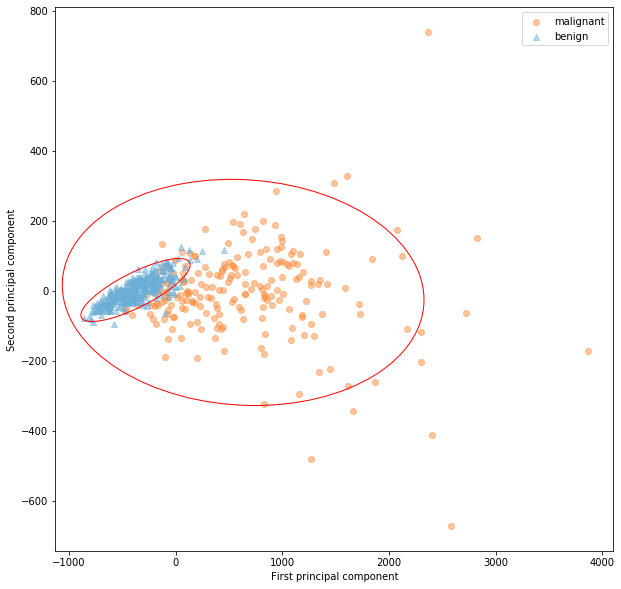

In [10]:
# Visualization
fig,ax = plt.subplots(figsize=(10,10))
plt.scatter(X[y=='M',0],X[y=='M',1],color=cmap(np.array([5]))[0],alpha=0.5,marker='o',label='malignant')
plt.scatter(X[y=='B',0],X[y=='B',1],color=cmap(np.array([1]))[0],alpha=0.5,marker='^',label='benign')
# confidence ellipse
confidence_ellipse(X[y=='M',0],X[y=='M',1],ax,edgecolor='red',n_std=2.45)
confidence_ellipse(X[y=='B',0],X[y=='B',1],ax,edgecolor='red',n_std=2.45)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()
plt.show()

From the above PCA diagram with confidence ellipse, we can see that the benign cases have a compact distribution while the malignant ones appear seperately. We can even draw a boundary decision like the confidence ellipse of the benign cases to determine whether a new case is benign or not. We can tell from the diagram that the accuracy would not be poor in the dataset. 

The experiment confirms our above idea on [Section 3.2](#pca_performance).

## 3. Model Construction

According to the above obsearvation and preprocessing, we can construct some models to learn more from the dataset anc choose one best model to do the prediction.

### 3.1 Divide Dataset

Before the building process, we need to spilt our dataset into trainingset and testing set.

In [11]:
# Split the data into training and testing datasets
from sklearn.model_selection import train_test_split
X = data.iloc[:,2:]
y = data.iloc[:,1]
X_train,X_test, Y_train,Y_test = train_test_split(X,y, test_size=0.3, random_state=0)

<a id='pca_performance'></a>

### 3.2 Construct Model based on PCA 

Due to the PCA diagram, we would like to try the principal components extracted from the original features to see their performance.

In [22]:
# Visualize the performance of classifier
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
def visualize_classifier(datasets, names, classifiers):
    '''
    datasets: (X,y) X - features y - labels
    names: a list of classifiers' names
    classifiers: a list of classifiers
    '''
    figure = plt.figure(figsize=(27, 9))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # unpack and normalization
        Xp,y = ds
        Xp = StandardScaler().fit_transform(Xp)

        # divide into training set and testing set
        Xp_train, Xp_test, Yp_train, Yp_test = train_test_split(Xp, y, test_size=0.3, random_state=0)
        # get the coordinate matrices
        x_min, x_max = Xp[:,0].min()-0.5, Xp[:,0].max()+0.5
        y_min, y_max = Xp[:,1].min()-0.5, Xp[:,1].max()+0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
        x_min,x_max,y_min,y_max = xx.min(), xx.max(), yy.min(), yy.max()

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#ff0000', '#0000ff'])

        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        ax.set_title("Input data")
        ax.scatter(Xp_train[:, 0], Xp_train[:, 1], c=Yp_train, cmap=cm_bright, edgecolors='k')         # plot the training points
        ax.scatter(Xp_test[:, 0], Xp_test[:, 1], c=Yp_test, cmap=cm_bright, alpha=0.5, edgecolors='k') # plot the testing points
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(Xp_train, Yp_train)
            score = clf.score(Xp_test, Yp_test)

            # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]*[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            # Plot the training points
            ax.scatter(Xp_train[:, 0], Xp_train[:, 1], c=Yp_train, cmap=cm_bright, edgecolors='k')
            # Plot the testing points
            ax.scatter(Xp_test[:, 0], Xp_test[:, 1], c=Yp_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())

            ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=25, horizontalalignment='right')
            i += 1

    plt.tight_layout()
    plt.show()

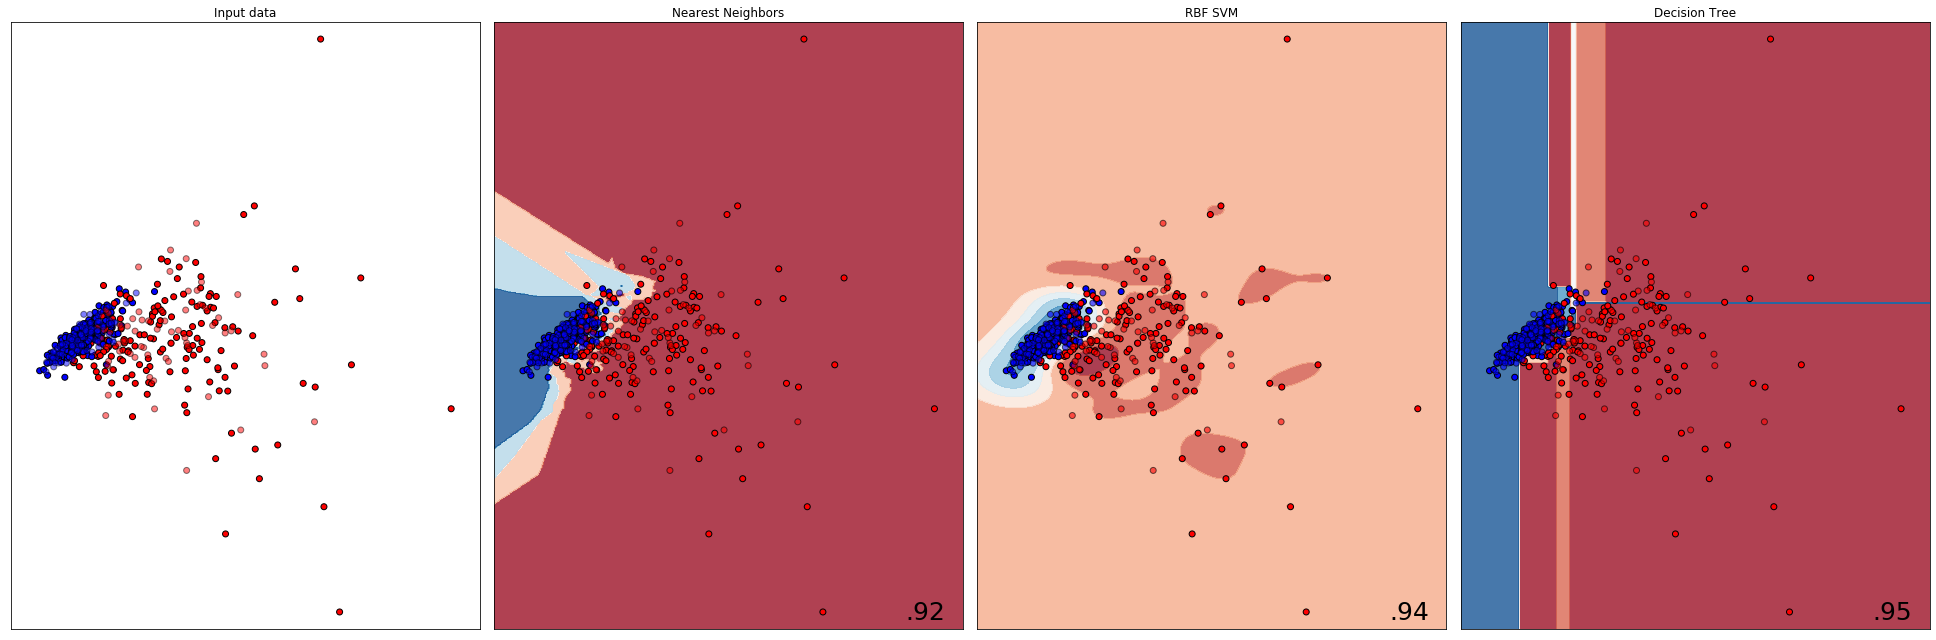

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# perform PCA reduction
pca = PCA(n_components=2) # 2-dimension
X_pca = pca.fit_transform(X)

# construct data
datasets = [(X_pca,(y=='B'))]
names = ["Nearest Neighbors", "RBF SVM", "Decision Tree"]
classifiers = [ KNeighborsClassifier(3), SVC(gamma=2, C=1), DecisionTreeClassifier(max_depth=5)]

# visualize the performance
visualize_classifier(datasets,names,classifiers)


The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set. The blue points are benign cases and red ones are malignant cases, from which we can also see the nature of decision boundaries of different classifiers.

According to the diagram, we can clearly see that the benign cases and malignant cases could be well seperated after PCA dimension reduction like we thought. The performance is good, and KNN, SVM, **Decision Tree** achieved 92%, 94%, **95%** in the testing set respectively.

### 3.3 Construct Tree-Type Model

Some dimension reduction methods like PCA and FLD can reduce the number of features, but in general, the resulted featurs are hard to explain. Therefore, here we take the consideration of the importance of features, and then either select some of them to do dimension reduction, or directly build a tree-based model on it. 

We utilize some quantitative measures based on information theory to decide the importance of features, and then do the classification based on them. Thus, these kind of tree-based models are easier to explain. 

accuracy on testing set: 0.953


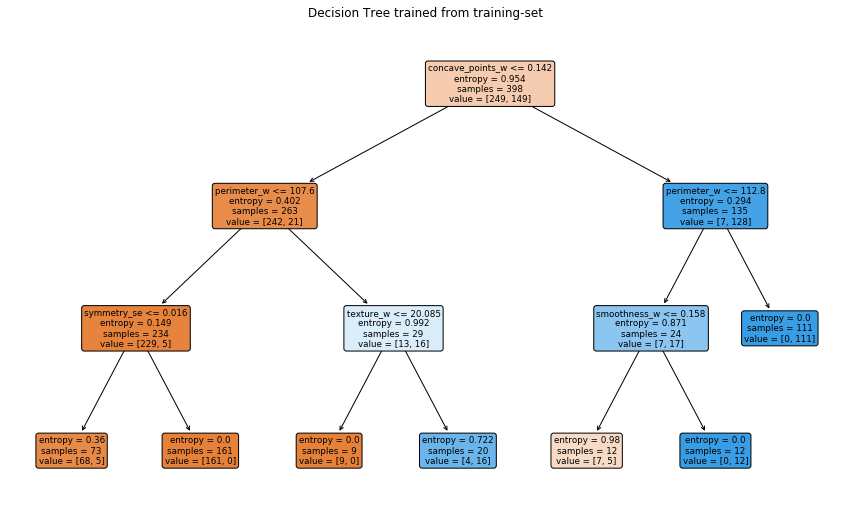

In [28]:
# construct the DecisionTree
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=3,splitter='best')
clf.fit(X_train,Y_train)
acc = clf.score(X_test,Y_test)
print('accuracy on testing set: %.3f' %acc)

# plot the tree
fig,ax = plt.subplots(figsize=(15,9))
plot_tree(clf,filled=True,feature_names=X_train.columns,rounded=True)
plt.title('Decision Tree trained from training-set')
plt.show()

We can even utilize the ensemble model to increase our performance, i.e., a number of Decision Trees together to make the classification. Therefore, we can use Random Forest model as the following. 

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,random_state=10,criterion='entropy',max_depth=6)
clf.fit(X_train,Y_train)
acc = clf.score(X_test,Y_test)
print('accuracy on testing set: %.3f' %acc)

accuracy on testing set: 0.977


<a id='importance'></a>

And the accuracy is quite high on the testing set, which is **97.7%**. Based on this good performance, we can say that the model we constructed is quite good. And the top 10 features are shown in the following pictures:

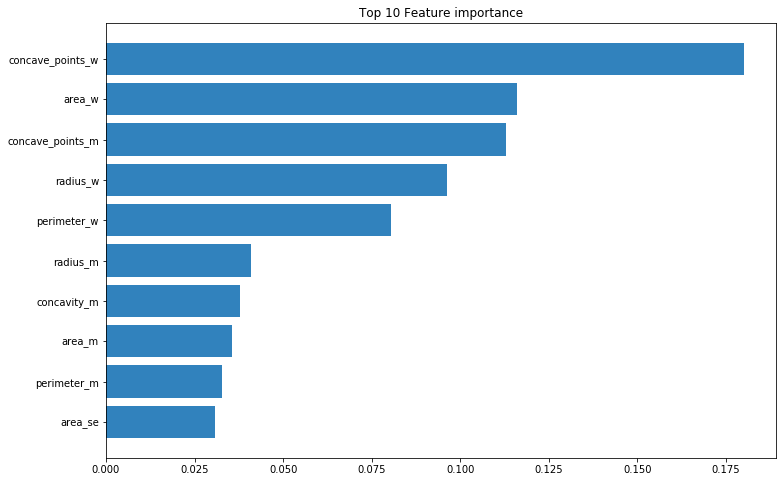

In [32]:
top_k = 10                              # the most important 5 features
f_important = clf.feature_importances_  # importance of each feature
sorted_idx = np.argsort(f_important)   # rank each feature based on importance
plt.figure(1, figsize=(12, 8))
plt.title("Top 10 Feature importance")
plt.barh(range(top_k),f_important[sorted_idx[-top_k:]],color=cmap(np.array([0]))[0])
plt.yticks(ticks=range(top_k),labels=X_train.columns[sorted_idx[-top_k:]])
plt.show()